<a href="https://colab.research.google.com/github/ShreyasJothish/taarifa_water_pumps/blob/master/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Load the data from Kaggle
!pip install kaggle

# Upgrade the version of Seaborn
!pip install -U seaborn

# Install category_encoders
!pip install category_encoders

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [35]:
# Mount the drive to download the data from Kaggle
from google.colab import drive
drive.mount('/content/drive')
%env KAGGLE_CONFIG_DIR=/content/drive/My Drive

!kaggle competitions download -c ds1-predictive-modeling-challenge

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
env: KAGGLE_CONFIG_DIR=/content/drive/My Drive
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test_features.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_labels.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_features.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
# Extract the csv files
!unzip train_features.csv.zip 
!unzip train_labels.csv.zip 
!unzip test_features.csv.zip

Archive:  train_features.csv.zip
replace train_features.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  train_labels.csv.zip
replace train_labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  test_features.csv.zip
replace test_features.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
# Generic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Loading the independent features as X and
# dependent variable as y
nan_values_list = ['Not Known', 'Unknown', 'None', 'Not known', 'not known', 
                   '-', 'unknown', 'Unknown Installer', '##', 'none']

train_features_df = pd.read_csv('train_features.csv', na_values=nan_values_list)
train_labels_df = pd.read_csv('train_labels.csv')


In [39]:
"""# Finding other possible NaN values 
null_cols = []

for col in train_features_df.columns:
  null_count = train_features_df[col].isnull().sum()
  null_cols.append(col)
  print(f'------------------------------------------------------------------')
  print(f'Column name {col}:')
  print(f'\tType {train_features_df[col].dtype}')
  print(f'\tNull count {null_count}')
  unique_values = train_features_df[col].unique()
  print(f'\tValue count {len(unique_values)}')
  #for value in unique_values:
    #print(f'\t\t{value}')
  print(f'------------------------------------------------------------------\n')"""

for col in train_features_df.columns:
  null_count = train_features_df[col].isnull().sum()
  unique_values = train_features_df[col].unique()
  print(f'{col},{train_features_df[col].dtype},{null_count},{len(unique_values)}')

id,int64,0,59400
amount_tsh,float64,0,98
date_recorded,object,0,356
funder,object,3668,1895
gps_height,int64,0,2428
installer,object,3704,2140
longitude,float64,0,57516
latitude,float64,0,57517
wpt_name,object,3588,37397
num_private,int64,0,65
basin,object,0,9
subvillage,object,372,19287
region,object,0,21
region_code,int64,0,27
district_code,int64,0,20
lga,object,0,125
ward,object,0,2092
population,int64,0,1049
public_meeting,object,3334,3
recorded_by,object,0,1
scheme_management,object,3878,12
scheme_name,object,28843,2694
permit,object,3056,3
construction_year,int64,0,55
extraction_type,object,0,18
extraction_type_group,object,0,13
extraction_type_class,object,0,7
management,object,561,12
management_group,object,561,5
payment,object,8157,7
payment_type,object,8157,7
water_quality,object,1876,8
quality_group,object,1876,6
quantity,object,789,5
quantity_group,object,789,5
source,object,66,10
source_type,object,0,7
source_class,object,278,3
waterpoint_type,object,0,7
waterpoint_type_gr

In [40]:
data_cardinality_df = pd.read_csv('./data cardinality.csv')

data_cardinality_df.head()

,Feature,Type,Null Count,Cardinality
0,id,int64,0,59400
1,amount_tsh,float64,0,98
2,date_recorded,object,0,356
3,funder,object,3668,1895
4,gps_height,int64,0,2428


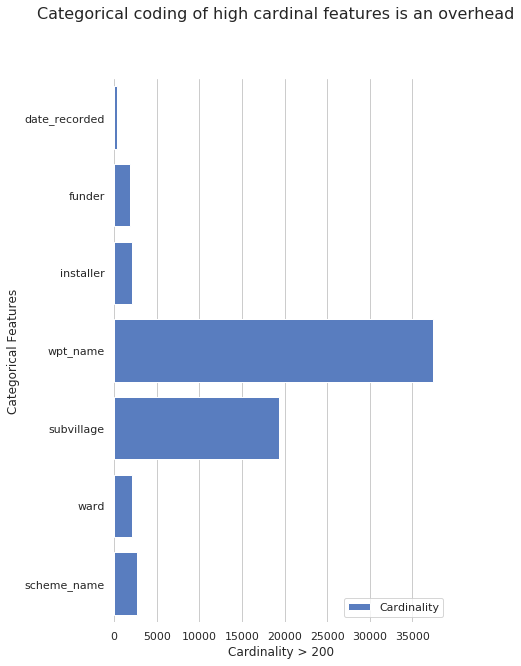

In [58]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 10))


# Plot the Cardinality
data_cardinality_obj_df = data_cardinality_df[data_cardinality_df['Type'] == 'object']
sns.set_color_codes("muted")
sns.barplot(x="Cardinality", y="Feature", 
            data=data_cardinality_obj_df[data_cardinality_obj_df['Cardinality'] > 200],
            label="Cardinality", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Categorical Features",
       xlabel="Cardinality > 200")
f.suptitle('Categorical coding of high cardinal features is an overhead', fontsize=16)
sns.despine(left=True, bottom=True)

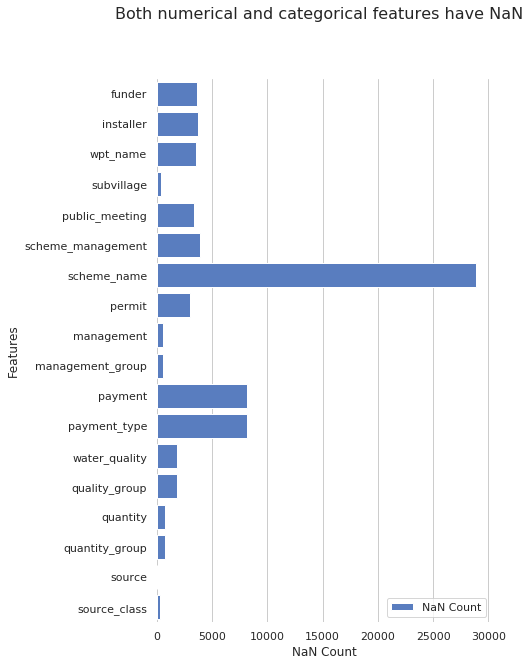

In [62]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 10))


# Plot the Null
sns.set_color_codes("muted")
sns.barplot(x="Null Count", y="Feature", 
            data=data_cardinality_df[data_cardinality_df['Null Count'] > 0],
            label="NaN Count", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Features",
       xlabel="NaN Count")
f.suptitle('Both numerical and categorical features have NaN', fontsize=16)
sns.despine(left=True, bottom=True)

In [43]:
data_cardinality_obj_df = data_cardinality_df[data_cardinality_df['Type'] == 'object']
data_cardinality_obj_df

,Feature,Type,Null Count,Cardinality
2,date_recorded,object,0,356
3,funder,object,3668,1895
5,installer,object,3704,2140
8,wpt_name,object,3588,37397
10,basin,object,0,9
11,subvillage,object,372,19287
12,region,object,0,21
15,lga,object,0,125
16,ward,object,0,2092
18,public_meeting,object,3334,3


In [0]:
# Test Code to be removed later
train_features_df = train_features_df.sample(1000, random_state=42)
train_labels_df = train_labels_df.sample(1000, random_state=42)
train_labels_df.status_group.value_counts()

functional                 524
non functional             404
functional needs repair     72
Name: status_group, dtype: int64

In [0]:
train_features_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
2980,37098,0.0,2012-10-09,Rural Water Supply And Sanitat,0,DWE,31.985658,-3.596360,Kasela,0,...,NaN,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
5246,14530,0.0,2012-11-03,Halmashauri Ya Manispa Tabora,0,Halmashauri ya manispa tabora,32.832815,-4.944937,Mbugani,0,...,never pay,milky,milky,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
22659,62607,10.0,2013-02-25,Siter Fransis,1675,DWE,35.488289,-4.242048,Kwa Leosi,0,...,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
39888,46053,0.0,2011-08-13,Kkkt,0,KKKT,33.140828,-9.059386,Jangi,0,...,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump
13361,47083,50.0,2013-02-08,Wateraid,1109,SEMA,34.217077,-4.430529,Mkima,0,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe


In [0]:
def atleast(row, value_count_series, count=5):
  # Identify items who have funded atleast 5 pumps
  if str(row) == "nan":
    return np.nan
  
  value_count = value_count_series.get(row)
  
  if value_count < count:
    return 0
  else:
    return 1

def character_grouping(row):
  # Reduce the dimension based on 1st character else return *
  if str(row) == "nan":
    return np.nan
  
  if row[0].isalpha():
    return row[0].lower()
  else:
    return "*"
  
def classify_lga(row):
  # Classify lga into Rural, Urban and others
  if str(row) == "nan":
    return np.nan
  
  if row.lower().find('rural'):
    return "rural"
  elif row.lower().find('urban'):
    return "urban"
  else:
    return "other"
  
def prefix_grouping(row, prefix_count=3):
  # Reduce the dimension based on 1st character else return *
  if str(row) == "nan":
    return np.nan
  
  if prefix_count > len(row):
    return "#"
  
  if row[0:prefix_count].isalpha():
    return row[0:prefix_count].lower()
  else:
    return "*"
  
def map_ward_construction_year():
  # Map ward to construction year
  
  # Here train_features_df shall be used as reference for
  # both trainging and test data set.
  df = train_features_df.copy()
  
  ward_construction_year_dict = {}
  ward_list = df['ward'].unique()
 
  # top ward's construction year shall be used incase there is no
  # matching construction year for individual ward.  
  top_ward = df['ward'].describe().top
  top_ward_construction_year =  \
    int(df[df['ward'] == top_ward]['construction_year'].median())

  for ward in ward_list:
    ward_construction_year = \
      int(df[df['ward'] == ward]['construction_year'].median())
    
    if ward not in ward_construction_year_dict:\
      
      if ward_construction_year == 0:
        ward_construction_year_dict[ward] = top_ward_construction_year
      else:
        ward_construction_year_dict[ward] = ward_construction_year
  
  return ward_construction_year_dict


def compute_construction_year(row, ward_construction_year_dict):
  # compute the consturction year if it is 0  
  ward = row['ward']
  construction_year = row['construction_year']  
  
  if construction_year == 0:
    return ward_construction_year_dict[ward]
  else:
    return construction_year


def compute_age(row):
  # compute the consturction age
  date_recorded = row['date_recorded']
  year_recorded = int(date_recorded.split('-')[0])
  
  construction_year = row['construction_year']
  
  return (year_recorded - construction_year)


def compute_year_recorded(row):
  # split year from date_recorded
  return int(row.split('-')[0])

def compute_month_recorded(row):
  # split year from date_recorded
  return int(row.split('-')[1])

In [0]:
def feature_engineering(df):
  # Create a column to indicate funder with atleast 5 pumps maintained.
  value_count_funder = df.funder.value_counts()
  df['funder_aleast_5'] = df['funder'].apply(atleast, 
                                            args=(value_count_funder,))
  
  # Create a column to indicate installer with atleast 5 pumps maintained.
  value_count_installer = df.installer.value_counts()
  df['installer_aleast_5'] = df['installer'].apply(atleast, 
                                            args=(value_count_installer,))
  
  # Apply mean for missing values of latitude and longitude
  mean_longitude = df['longitude'].mean()
  df['longitude'] = df['longitude'].apply(lambda x: mean_longitude if round(x, 2) == 0 else x)
  mean_latitude = df['latitude'].mean()
  df['latitude'] = df['latitude'].apply(lambda x: mean_latitude if round(x, 2) == 0 else x)
  
  # Grouping wpt_name, subvillage based on 1st alphabet
  df['wpt_name_engineered'] = df['wpt_name'].apply(character_grouping)
  df['subvillage_engineered'] = df['subvillage'].apply(character_grouping)
  
  # Classify lga based on Rural, Urban and others
  df['lga_engineered'] = df['lga'].apply(classify_lga)
  
  # Grouping ward, scheme_name based on 1st alphabet
  df['ward_engineered'] = df['ward'].apply(character_grouping)
  df['scheme_name_engineered'] = df['scheme_name'].apply(character_grouping)
  
  # Grouping based on prefix
  df['funder_prefix_grouping'] = df['funder'].apply(prefix_grouping)
  df['installer_prefix_grouping'] = df['installer'].apply(prefix_grouping)
  df['wpt_name_prefix_grouping'] = df['wpt_name'].apply(prefix_grouping)
  df['subvillage_prefix_grouping'] = df['subvillage'].apply(prefix_grouping)
  df['lga_prefix_grouping'] = df['lga'].apply(prefix_grouping)
  df['ward_prefix_grouping'] = df['ward'].apply(prefix_grouping)
  df['scheme_name_prefix_grouping'] = df['scheme_name'].apply(prefix_grouping)
  
  # Compute missing construction year
  ward_construction_year_dict = map_ward_construction_year()
  df['construction_year'] = df.apply(compute_construction_year, axis=1, 
                                     args=(ward_construction_year_dict,))
  
  # Compute age of well
  df['age'] = df.apply(compute_age, axis=1)
  
  # Fetch Year and Month of date recorded
  df['year_recorder'] = df['date_recorded'].apply(compute_year_recorded)
  df['month_recorder'] = df['date_recorded'].apply(compute_month_recorded)
  

In [0]:
feature_engineering(train_features_df)

In [0]:
test_df = train_features_df.sample(5, random_state=42)
test_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,funder_prefix_grouping,installer_prefix_grouping,wpt_name_prefix_grouping,subvillage_prefix_grouping,lga_prefix_grouping,ward_prefix_grouping,scheme_name_prefix_grouping,age,year_recorder,month_recorder
54356,72456,0.0,2011-07-12,Hesawa,0,HESAWA,30.679736,-2.552625,Rubona Dp No 3,0,...,hes,hes,rub,rub,nga,kib,kum,3,2011,7
24446,41769,5000.0,2013-02-26,Dmdd,1638,DMDD,35.424516,-4.344767,Kwa Lambo,0,...,dmd,dmd,kwa,man,bab,dab,NaN,5,2013,2
2095,72731,70.0,2013-02-24,Fini Water,183,Fini water,39.849714,-10.730865,Kwa Selemani Musa,0,...,fin,fin,kwa,kas,mtw,nam,mny,35,2013,2
50474,33485,0.0,2011-07-18,Tasaf,0,VTECOS,31.545183,-1.600542,Shule Ya Msingi Nyakabulala,0,...,tas,vte,shu,nya,buk,kik,NaN,3,2011,7
19428,22451,0.0,2012-10-28,Serikali,1825,Serikali,34.627681,-1.357737,Kwa Mugesi Mwita,0,...,ser,ser,kwa,nya,tar,mur,NaN,3,2012,10


In [0]:
  test_df['age'] = test_df.apply(compute_age, axis=1)

In [0]:
test_df.loc[:,['date_recorded','construction_year','age']]

,date_recorded,construction_year,age
54356,2011-07-12,2008,3
24446,2013-02-26,2008,5
2095,2013-02-24,1978,35
50474,2011-07-18,2008,3
19428,2012-10-28,2009,3
